# Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Loading and Previewing the Dataset

In [ ]:

df = pd.read_csv("Crop and fertilizer dataset.csv")


In [ ]:
df.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District_Name  4513 non-null   object 
 1   Soil_color     4513 non-null   object 
 2   Nitrogen       4513 non-null   int64  
 3   Phosphorus     4513 non-null   int64  
 4   Potassium      4513 non-null   int64  
 5   pH             4513 non-null   float64
 6   Rainfall       4513 non-null   int64  
 7   Temperature    4513 non-null   int64  
 8   Crop           4513 non-null   object 
 9   Fertilizer     4513 non-null   object 
 10  Link           4513 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 388.0+ KB


In [ ]:
df.isnull().sum()

,0
District_Name,0
Soil_color,0
Nitrogen,0
Phosphorus,0
Potassium,0
pH,0
Rainfall,0
Temperature,0
Crop,0
Fertilizer,0


In [ ]:
for col in df.columns:
    print(f"{col} ({df[col].dtype}): {df[col].nunique()} unique values")


District_Name (object): 5 unique values
Soil_color (object): 7 unique values
Nitrogen (int64): 27 unique values
Phosphorus (int64): 17 unique values
Potassium (int64): 30 unique values
pH (float64): 7 unique values
Rainfall (int64): 15 unique values
Temperature (int64): 7 unique values
Crop (object): 16 unique values
Fertilizer (object): 19 unique values
Link (object): 278 unique values


# 🔍📈 **Exploratory Data Analysis (EDA)**

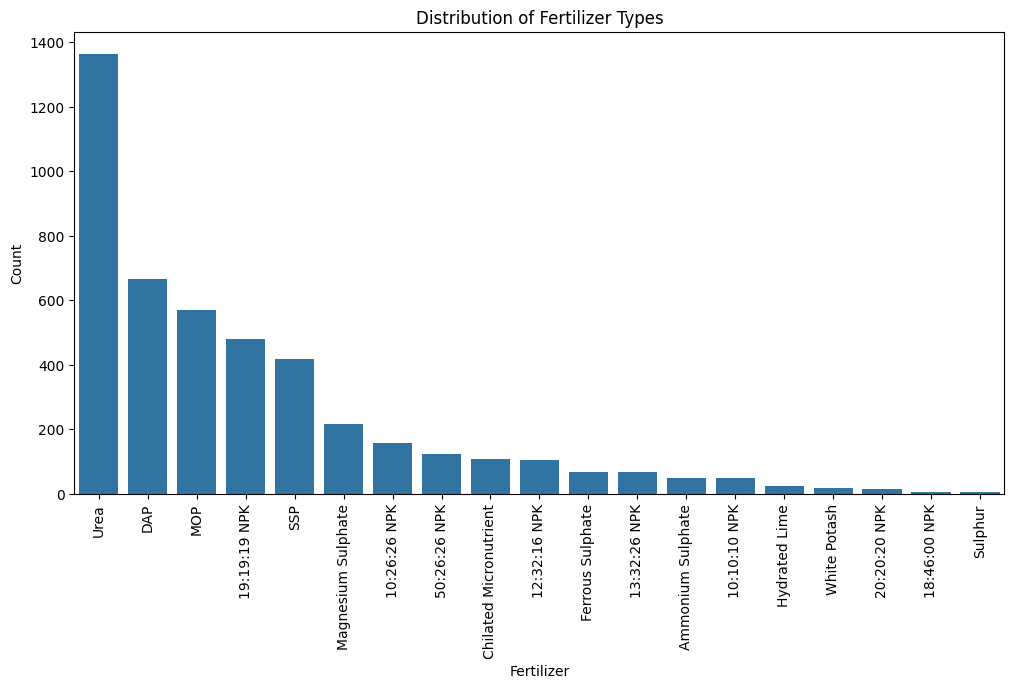

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Fertilizer', order=df['Fertilizer'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Fertilizer Types")
plt.xlabel("Fertilizer")
plt.ylabel("Count")
plt.show()

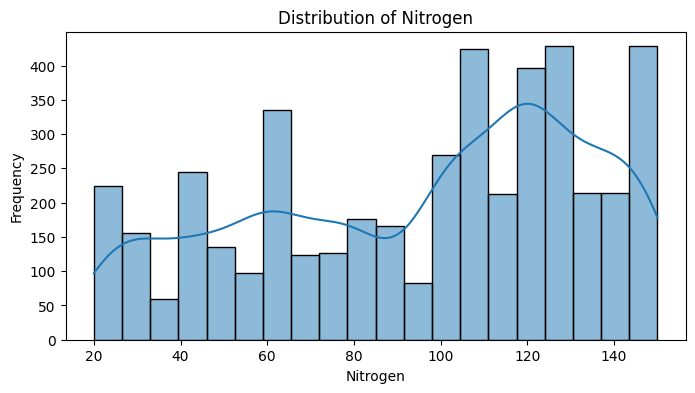

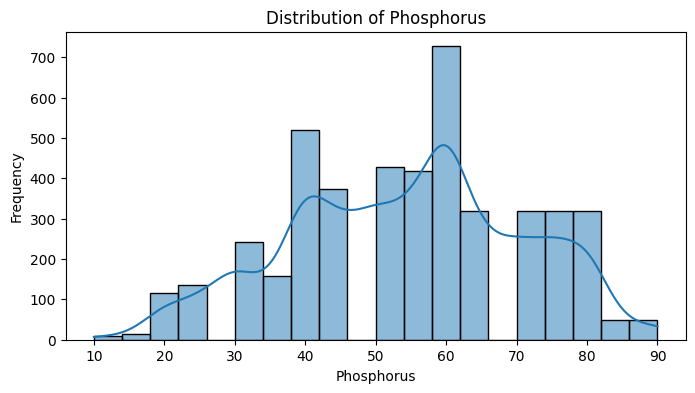

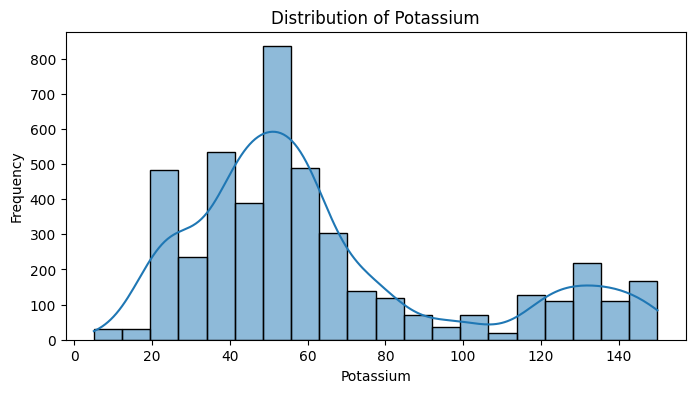

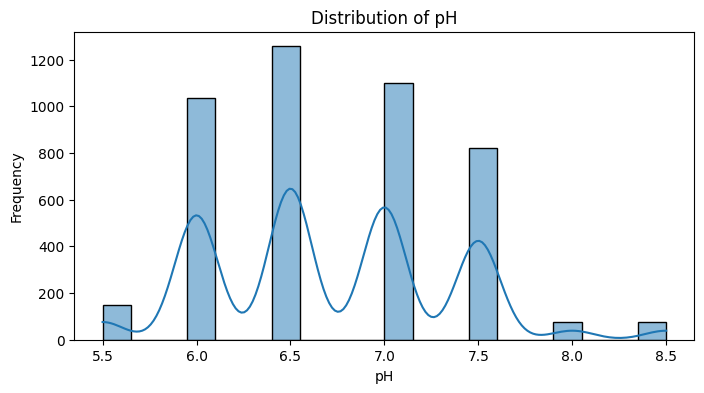

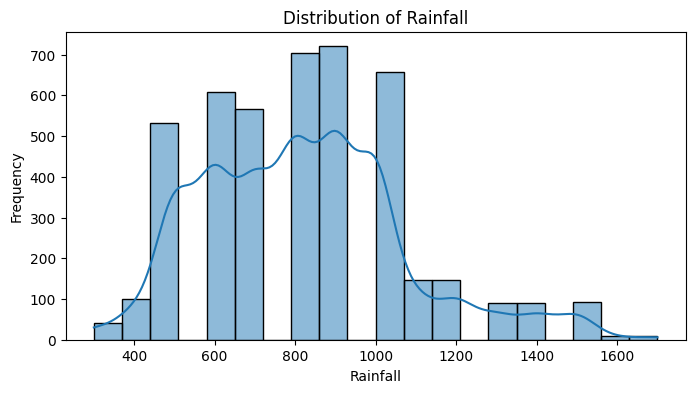

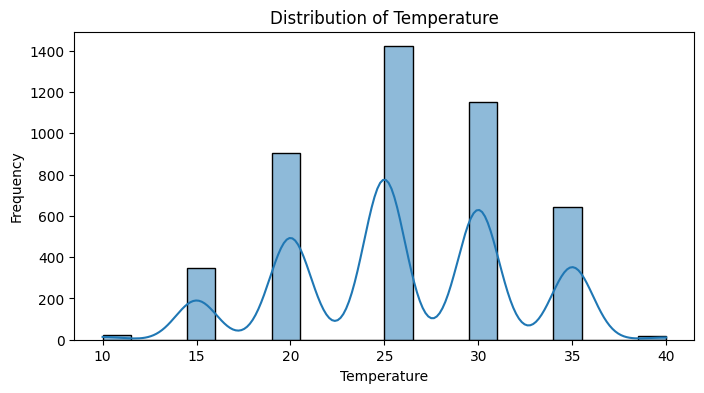

In [ ]:
numerical_cols = ['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


<ipython-input-10-26d16b730c3f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Fertilizer"], y=df["Phosphorus"], palette="coolwarm")


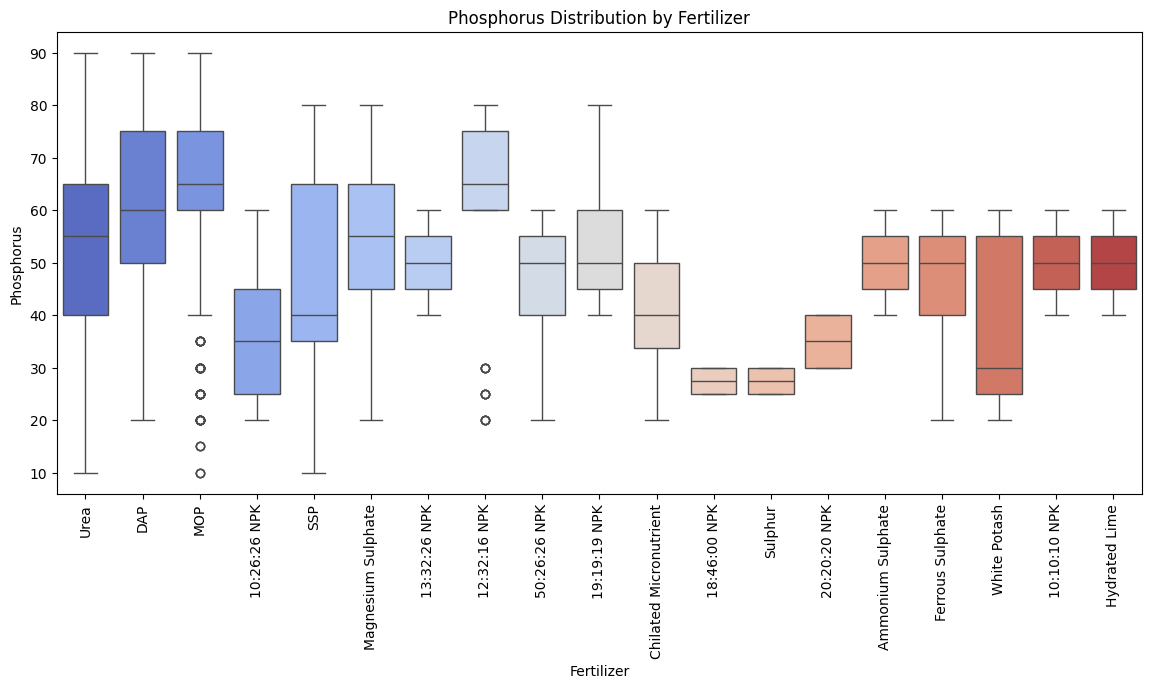

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x=df["Fertilizer"], y=df["Phosphorus"], palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Phosphorus Distribution by Fertilizer")
plt.show()

<ipython-input-11-ea9452abd274>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Fertilizer"], y=df["Potassium"], palette="coolwarm")


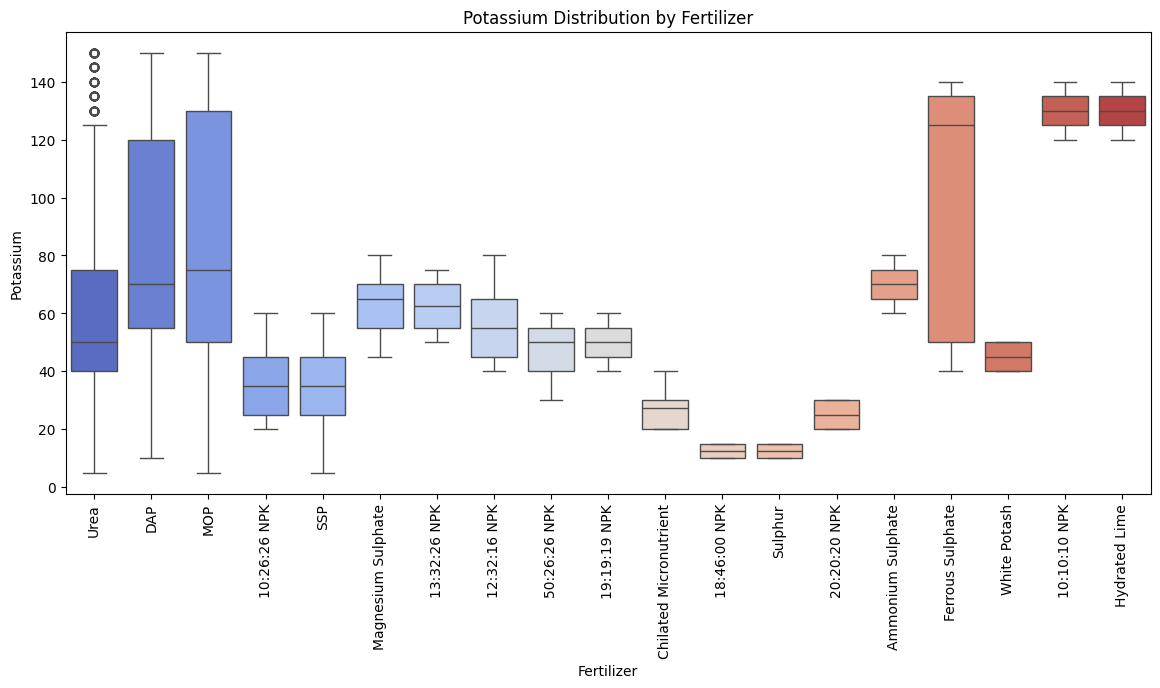

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x=df["Fertilizer"], y=df["Potassium"], palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Potassium Distribution by Fertilizer")
plt.show()


<ipython-input-12-5e191b089922>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Fertilizer"], y=df["pH"], palette="coolwarm")


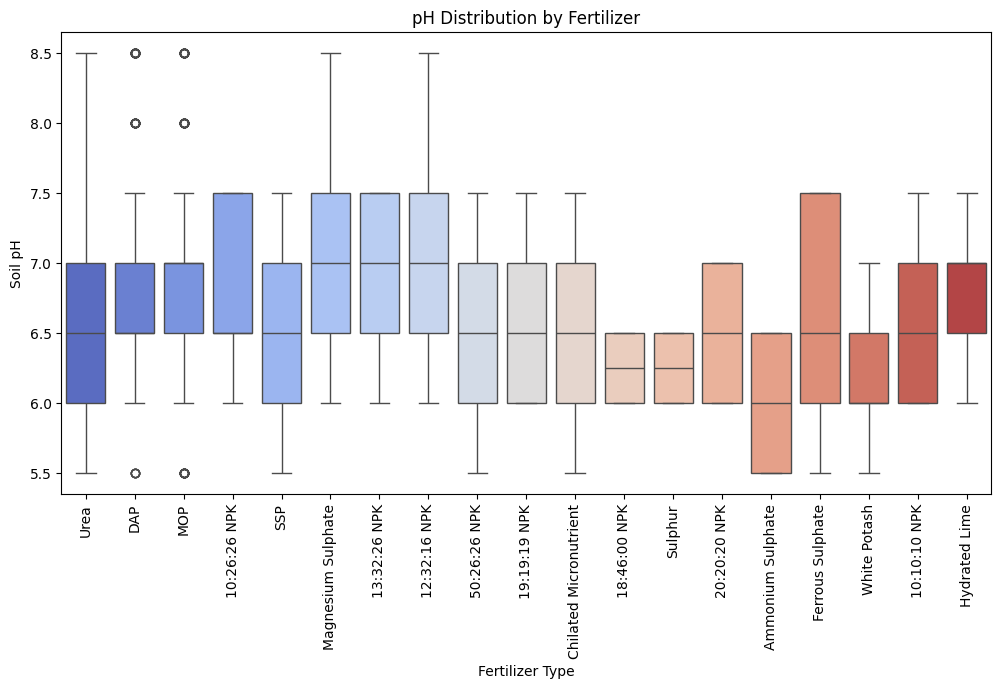

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Fertilizer"], y=df["pH"], palette="coolwarm")
plt.xticks(rotation=90)
plt.title("pH Distribution by Fertilizer")
plt.xlabel("Fertilizer Type")
plt.ylabel("Soil pH")
plt.show()


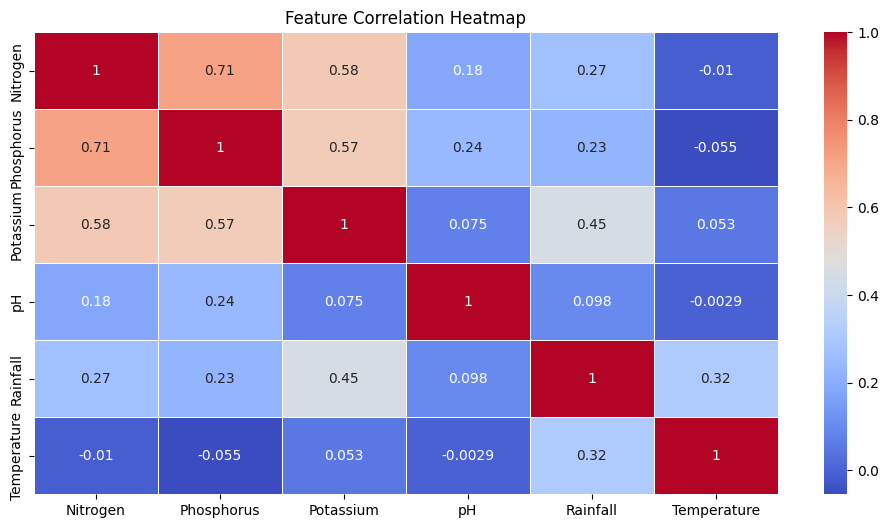

In [ ]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=["number"])

# Plot correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



# 🔧 Preprocessing Section

In [ ]:
le = LabelEncoder()
df["Crop"] = le.fit_transform(df["Crop"])
df["Soil_color"] = le.fit_transform(df["Soil_color"])
df["Fertilizer"] = le.fit_transform(df["Fertilizer"])

In [ ]:
df

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,Kolhapur,0,75,50,100,6.5,1000,20,11,17,https://youtu.be/2t5Am0xLTOo
1,Kolhapur,0,80,50,100,6.5,1000,20,11,17,https://youtu.be/2t5Am0xLTOo
2,Kolhapur,0,85,50,100,6.5,1000,20,11,17,https://youtu.be/2t5Am0xLTOo
3,Kolhapur,0,90,50,100,6.5,1000,20,11,17,https://youtu.be/2t5Am0xLTOo
4,Kolhapur,0,95,50,100,6.5,1000,20,11,17,https://youtu.be/2t5Am0xLTOo
...,...,...,...,...,...,...,...,...,...,...,...
4508,Pune,0,130,80,150,7.0,1400,30,11,13,https://youtu.be/2t5Am0xLTOo
4509,Pune,0,135,80,150,7.0,1400,30,11,13,https://youtu.be/2t5Am0xLTOo
4510,Pune,0,140,80,150,7.0,1400,30,11,13,https://youtu.be/2t5Am0xLTOo
4511,Pune,0,145,80,150,7.0,1400,30,11,13,https://youtu.be/2t5Am0xLTOo


In [ ]:
from scipy.stats import zscore

# Compute Z-scores for outlier detection
z_scores = np.abs(zscore(df[["Nitrogen", "Phosphorus", "Potassium"]]))
outliers = (z_scores > 3).sum()

print("Outliers detected per feature:")
print(outliers)


Outliers detected per feature:
Nitrogen      0
Phosphorus    0
Potassium     0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df[["Nitrogen", "Phosphorus", "Potassium", "pH"]] = scaler.fit_transform(df[["Nitrogen", "Phosphorus", "Potassium", "pH"]])


# 🧠 Feature Engineering

In [ ]:
df["Total_NPK"] = df["Nitrogen"] + df["Phosphorus"] + df["Potassium"]
df["N_P_ratio"] = df["Nitrogen"] / (df["Phosphorus"] + 1)
df["N_K_ratio"] = df["Nitrogen"] / (df["Potassium"] + 1)
df["P_K_ratio"] = df["Phosphorus"] / (df["Potassium"] + 1)
df["N_minus_P"] = df["Nitrogen"] - df["Phosphorus"]
df["P_minus_K"] = df["Phosphorus"] - df["Potassium"]


crop_group = df.groupby("Crop")[["Nitrogen", "Phosphorus", "Potassium"]].transform("mean")
df["N_diff_crop"] = df["Nitrogen"] - crop_group["Nitrogen"]
df["P_diff_crop"] = df["Phosphorus"] - crop_group["Phosphorus"]
df["K_diff_crop"] = df["Potassium"] - crop_group["Potassium"]

# 📈 Modeling Section

In [ ]:
# Defining features (X) and target (y)
X = df.drop(columns=["Fertilizer","District_Name","Link"])
y = df["Fertilizer"]


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


### 🚀 Model Training & Evaluation

✅ Training Accuracy: 99.99%

📊 Classification Report (Training):

                        precision    recall  f1-score   support

          10:10:10 NPK       1.00      1.00      1.00      1104
          10:26:26 NPK       1.00      1.00      1.00      1081
          12:32:16 NPK       1.00      1.00      1.00      1080
          13:32:26 NPK       1.00      1.00      1.00      1082
          18:46:00 NPK       1.00      1.00      1.00      1083
          19:19:19 NPK       1.00      1.00      1.00      1093
          20:20:20 NPK       1.00      1.00      1.00      1077
          50:26:26 NPK       1.00      1.00      1.00      1105
     Ammonium Sulphate       1.00      1.00      1.00      1090
Chilated Micronutrient       1.00      1.00      1.00      1101
                   DAP       1.00      1.00      1.00      1119
      Ferrous Sulphate       1.00      1.00      1.00      1099
         Hydrated Lime       1.00      1.00      1.00      1085
                   MOP       1.00    

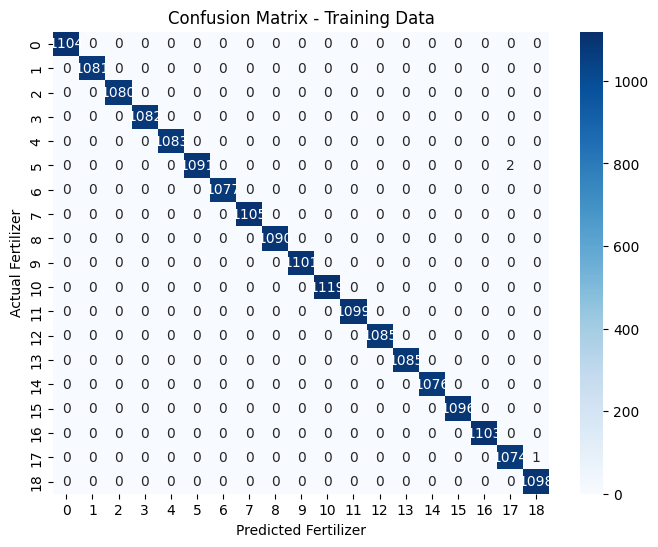

In [ ]:

from xgboost import XGBClassifier


model = XGBClassifier(n_estimators=300, learning_rate=0.5, max_depth=5, random_state=42)
model.fit(X_train, y_train)


y_train_pred_encoded = model.predict(X_train)
y_train_pred = le.inverse_transform(y_train_pred_encoded)
y_train_actual = le.inverse_transform(y_train)

train_accuracy = accuracy_score(y_train_actual, y_train_pred)
print(f"✅ Training Accuracy: {train_accuracy:.2%}")
print("\n📊 Classification Report (Training):\n")
print(classification_report(y_train_actual, y_train_pred))


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_train_actual, y_train_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Fertilizer")
plt.ylabel("Actual Fertilizer")
plt.title("Confusion Matrix - Training Data")
plt.show()


✅ Test Accuracy: 99.48%

📊 Classification Report (Test):

                        precision    recall  f1-score   support

          10:10:10 NPK       1.00      1.00      1.00       260
          10:26:26 NPK       1.00      1.00      1.00       283
          12:32:16 NPK       1.00      1.00      1.00       284
          13:32:26 NPK       1.00      1.00      1.00       282
          18:46:00 NPK       1.00      1.00      1.00       281
          19:19:19 NPK       0.99      0.98      0.98       271
          20:20:20 NPK       1.00      1.00      1.00       287
          50:26:26 NPK       1.00      1.00      1.00       259
     Ammonium Sulphate       0.99      1.00      1.00       274
Chilated Micronutrient       1.00      1.00      1.00       263
                   DAP       1.00      0.98      0.99       245
      Ferrous Sulphate       1.00      0.99      0.99       265
         Hydrated Lime       1.00      1.00      1.00       279
                   MOP       0.98      0.99 

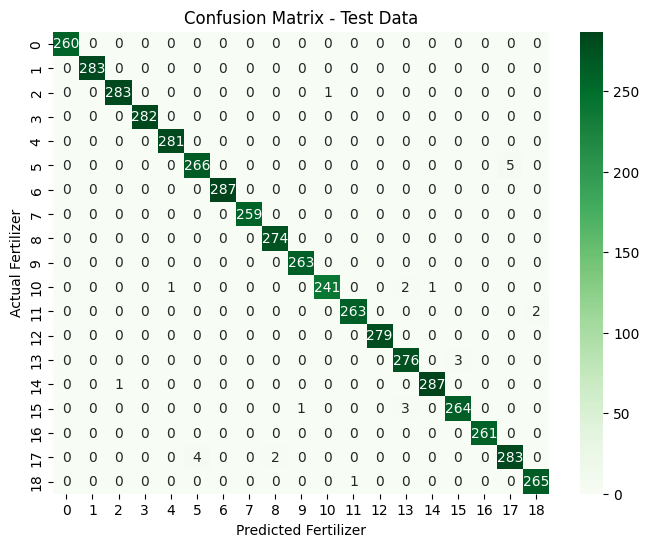

In [ ]:
# Test accuracy, classification report & confusion matrix
y_test_pred_encoded = model.predict(X_test)
y_test_pred = le.inverse_transform(y_test_pred_encoded)
y_test_actual = le.inverse_transform(y_test)

test_accuracy = accuracy_score(y_test_actual, y_test_pred)
print(f"\n✅ Test Accuracy: {test_accuracy:.2%}")
print("\n📊 Classification Report (Test):\n")
print(classification_report(y_test_actual, y_test_pred))


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_actual, y_test_pred), annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted Fertilizer")
plt.ylabel("Actual Fertilizer")
plt.title("Confusion Matrix - Test Data")
plt.show()


In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(model, "fertilizer_prediction_model.pkl")
print("✅ Model saved successfully!")


✅ Model saved successfully!
